<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB
(15000, 7) (12000, 7) (3000, 7)
[125.58828  222.11377   38.725952 ... 144.3179    23.425894  90.100494]
Mean Absolute Error =  1.4833678883314132


ValueError: Feature shape mismatch, expected: 7, got 2

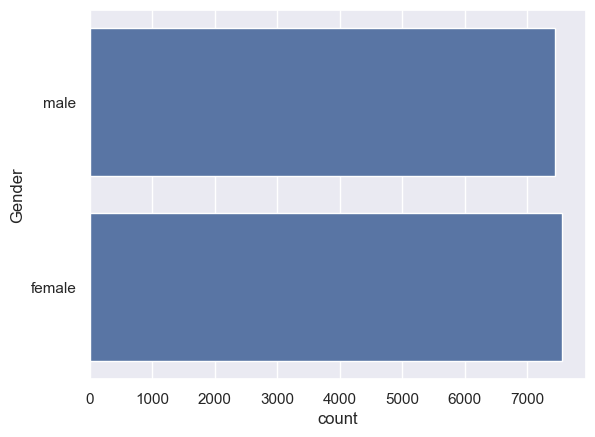

<Figure size 1000x1000 with 0 Axes>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics
calories = pd.read_csv('calories.csv')
calories.head()
exercise_data = pd.read_csv('exercise.csv')
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)
calories_data.info()
sns.set()
sns.countplot(calories_data['Gender'])
plt.figure(figsize=(10,10))
calories_data.replace({"Gender": {'male': 0, 'female': 1}}, inplace=True)

##calories_data.replace({"Gender":{'male':0,'female':1}}, inplace=True)
X = calories_data.drop(columns=['User_ID','Calories'], axis=1)
Y = calories_data['Calories']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)
print(X.shape, X_train.shape, X_test.shape)
model = XGBRegressor()
model.fit(X_train, Y_train)
test_data_prediction = model.predict(X_test)
print(test_data_prediction)
mae = metrics.mean_absolute_error(Y_test, test_data_prediction)
print("Mean Absolute Error = ", mae)
import pickle
pickle.dump(model, open('model.pkl','wb'))

model = pickle.load(open('model.pkl','rb'))
print(model.predict([[20.1, 170, 65, 30, 120, 98.6, 0]]))  
